Zad. 3

Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy
rozważane próbki danych pochodzą w rozkładów 𝜒
2 o różnej liczbie stopni swobody. Do celów
symulacji proszę przesunąć generowane dane tak, by miały tę samą wartość oczekiwaną. Uzyskane
wyniki należy przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych (można rozważać różne liczebności w każdej z próbek),
- liczby stopni swobody

In [1]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

Przeprowadzamy po 100 symulacji dla każdej liczby danych / liczby stopni swobody

In [2]:
num_simulations = 100
dfs = [i for i in range(1, 100, 5)]

size = 100
size2 = 20
size3 = 50

results = np.zeros((len(dfs), len(dfs)))
results_size20 = np.zeros((len(dfs), len(dfs)))
results_size50 = np.zeros((len(dfs), len(dfs)))

In [3]:

for i, df1 in enumerate(dfs):
    for j, df2 in enumerate(dfs):
 
        counter = 0
        counter_size20 = 0
        counter_size50 = 0


        for _ in range(num_simulations):
      
            sample1 = np.random.chisquare(df1, size) / df1
            sample2 = np.random.chisquare(df2, size) / df2
            sample3_size20 = np.random.chisquare(df2, size2) / df2
            sample4_size50 = np.random.chisquare(df2, size3) / df2
        
 
            _, p_value = ks_2samp(sample1, sample2)
            _, p_value_size20 = ks_2samp(sample1, sample3_size20)
            _, p_value_size50 = ks_2samp(sample1, sample4_size50)

            if p_value <= 0.05:
                counter += 1
            if p_value_size20 <= 0.05:
                counter_size20 += 1
            if p_value_size50 <= 0.05:
                counter_size50 += 1


        power = counter / num_simulations
        power_size20 = counter_size20 / num_simulations
        power_size50 = counter_size50 / num_simulations
        results[i, j] = power
        results_size20[i,j] = power_size20
        results_size50[i,j] = power_size50



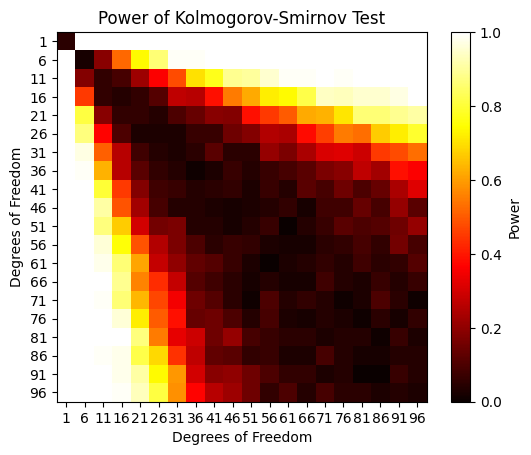

In [4]:

plt.imshow(results, cmap='hot', interpolation='nearest')
plt.colorbar(label='Power')
plt.xticks(np.arange(len(dfs)), dfs)
plt.yticks(np.arange(len(dfs)), dfs)
plt.xlabel('Degrees of Freedom')
plt.ylabel('Degrees of Freedom')
plt.title('Power of Kolmogorov-Smirnov Test')
plt.show()


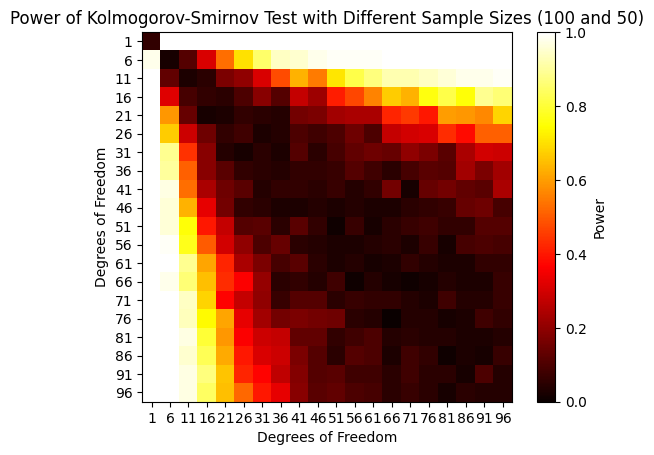

In [5]:
plt.imshow(results_size50, cmap='hot', interpolation='nearest')
plt.colorbar(label='Power')
plt.xticks(np.arange(len(dfs)), dfs)
plt.yticks(np.arange(len(dfs)), dfs)
plt.xlabel('Degrees of Freedom')
plt.ylabel('Degrees of Freedom')
plt.title('Power of Kolmogorov-Smirnov Test with Different Sample Sizes (100 and 50)')
plt.show()

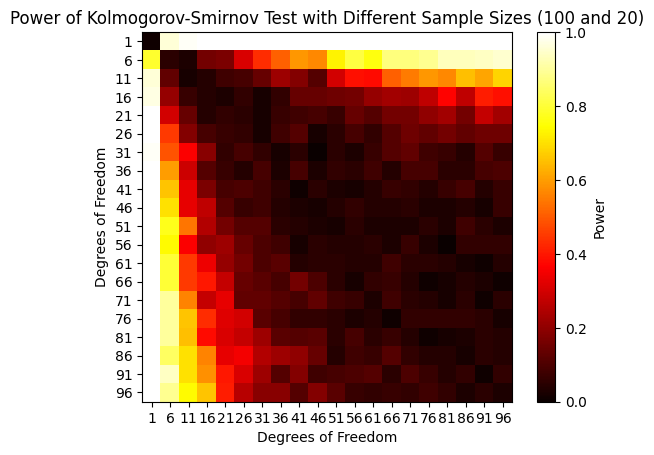

In [6]:
plt.imshow(results_size20, cmap='hot', interpolation='nearest')
plt.colorbar(label='Power')
plt.xticks(np.arange(len(dfs)), dfs)
plt.yticks(np.arange(len(dfs)), dfs)
plt.xlabel('Degrees of Freedom')
plt.ylabel('Degrees of Freedom')
plt.title('Power of Kolmogorov-Smirnov Test with Different Sample Sizes (100 and 20)')
plt.show()


Podsumowując moc testu Kołmogorowa-Smirnowa zależy od stopni swobody rozkładów chi-kwadrat. Wydaje się, że moc testu zwiększa się wraz z różnicą w stopniach swobody, co widać po jasnych obszarach na przekątnej wykresu. Jednak dla niektórych kombinacji stopni swobody moc testu jest niska, co widać po ciemnych obszarach na wykresie. H0 - rozkłady są takie same, gdy mamy różne stopnie swobody rozkłady nie są takie same i powinniśmy je odrzucić, a więc jeśli je często odrzucamy znaczy, że moc jest wysoka. Wraz ze zwiększeniem różnicy  w próbkach zaburzamy zdolność testu do odrzucenia h0 przy mniejszych różnicach. Wniosek jest następujący: powinniśmy używać operować na zbliżonej ilości danych.